# Preprocessing

## This Notebook handles data preprocessing.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import string
import time
from joblib import dump, load

from academia_tag_recommender.documents import documents

### Vectorizer Tests

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from academia_tag_recommender.preprocessor import BasicPreprocessor
from academia_tag_recommender.tokenizer import BasicTokenizer, EnglishStemmer, PorterStemmer, LancasterStemmer, Lemmatizer
from academia_tag_recommender.vectorizer_computation import get_vect_feat_with_params

texts = list(map(lambda x: x.text, documents))

## Parameter
* Vectorizer `CountVectorizer`, `TfidfVectorizer`
* Preprocessor `None`, `BasicPreprocessor` 
* Tokenizer
    * without normalization: `None`, `BasicTokenizer`
    * with normalization:
        * Stemmer: `EnglishStemmer`, `PorterStemmer`, `LancasterStemmer`
        * Lemmatizer: `Lemmatizer`
* Stopwords `None`, `'english'`
* NGrams `(1, 1)`, `(1, 2)`, `(1, 3)`, `(2, 2)`, `(2, 3)`, `(3, 3)`

In [ ]:
vectorizers = [CountVectorizer, TfidfVectorizer]
preprocessors = [None, BasicPreprocessor]
tokenizers = [None, BasicTokenizer, EnglishStemmer, PorterStemmer, Lemmatizer]
stop_word_options = [None, 'yes']
n_gram_options = [(1,1), (1,2), (2,2), (1,3), (2,3), (3,3)]

In [3]:
# Document representation models can be accessed using
[vectorizer, features] = get_vect_feat_with_params(texts, CountVectorizer, EnglishStemmer, BasicPreprocessor, 'yes', (1, 1), False)

Received saved model


In [22]:
results = load('../models/document_representation/results.joblib')

240

In [13]:
unigrams = [result for result in results if result['n_grams'] == '(1, 1)']
bigrams = [result for result in results if result['n_grams'] == '(2, 2)']
trigrams = [result for result in results if result['n_grams'] == '(3, 3)']

In [15]:
def plot_barchart(feature):
    labels = ['none', 'BasicTokenizer', 'EnglishStemmer', 'PorterStemmer', 'Lemmatizer']
    stopwords_with_p = np.arange(len(labels))
    no_stopwords_with_p = np.arange(len(labels))
    stopwords_without_p = np.arange(len(labels))
    no_stopwords_without_p = np.arange(len(labels))
    for label in labels:
        for unigram in unigrams:
            if unigram['v'] == 'CountVectorizer':
                if unigram['t'] == label:
                    value = unigram[feature]
                    if feature == 'shape':
                        value = value[1]
                    index = labels.index(label)
                    if unigram['stopwords'] == 'yes':
                        if unigram['p'] == 'BasicPreprocessor':
                            stopwords_with_p[index] = value
                        else:
                            stopwords_without_p[index] = value
                    else:
                        if unigram['p'] == 'BasicPreprocessor':
                            no_stopwords_with_p[index] = value
                        else:
                            no_stopwords_without_p[index] = value
                            
    x = np.arange(len(labels))
    width = 0.20

    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(x - width*2, no_stopwords_without_p, width, label='p = none, stopwords = none')
    ax.bar(x - width, stopwords_without_p, width, label='p = none, stopwords = yes')
    ax.bar(x, no_stopwords_with_p, width, label='p = BasicPreprocessor, stopwords = none')
    ax.bar(x + width, stopwords_with_p, width, label='p = BasicPreprocessor, stopwords = yes')

    ax.set_ylabel('{}'.format(feature.capitalize()))
    ax.set_title('{} by Tokenizer w/o Preprocessor and w/o Stopwords'.format(feature.capitalize()))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

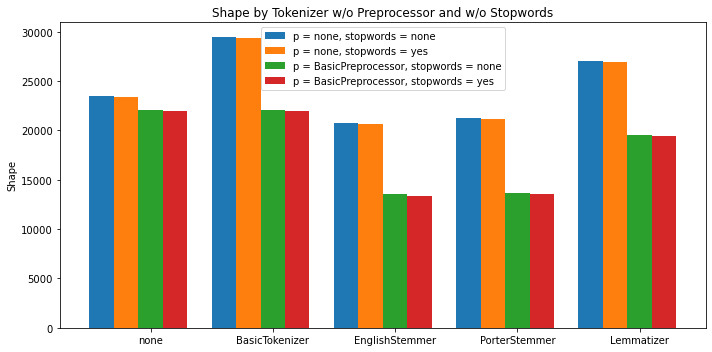

In [16]:
plot_barchart('shape')

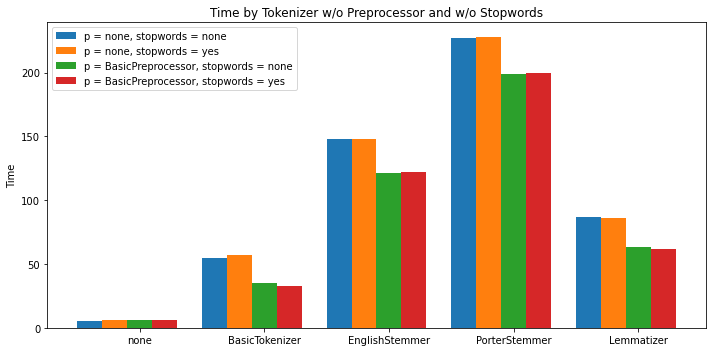

In [17]:
plot_barchart('time')

None


ModuleNotFoundError: No module named 'preprocessor'

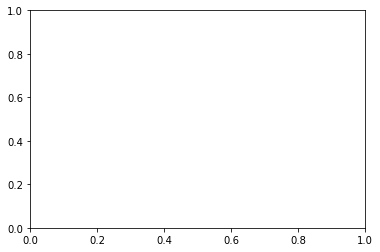

In [25]:
v = TfidfVectorizer
p = BasicPreprocessor
ts = [None, BasicTokenizer, EnglishStemmer, PorterStemmer, Lemmatizer]
stopwords = 'yes'
ngrams = '(1, 1)'

fig, ax = plt.subplots()

for tokenizer in ts:
    #print(tokenizer.__name__ if tokenizer else 'None')
    [vectorizer, features] = get_vect_feat_with_params(texts, v, tokenizer, p, stopwords, ngrams, False)

    sum_words = features.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = list(sorted(words_freq, key = lambda x: x[1], reverse=True))
    words_freq = [(word, freq) for (word, freq) in words_freq if freq > 200]
    stepSize = 1
    x = np.arange(len(words_freq))
    y = [freq for (word, freq) in words_freq]

    ax.plot(x,y)

plt.ylabel('count')
plt.legend([t.__name__ if t else 'None' for t in ts])
plt.show()

In [ ]:
ranges = [(1, 1), (2, 10), (11, 100), (101, 1000), (1001, 10000), (10001, 100000), (1001, 2000), (2001, 3000), (3001, 4000), (4001, 5000), (5001, 6000), (6001, 7000), (7001, 8000), (8001, 9000), (9001, 10000), (10001, 100000)]

In [ ]:
def getFrequency(data, start, end):
    freq = len([(word, freq) for (word, freq) in data if freq >= start and freq <= end])
    return freq

In [ ]:
def getFrequencies(data):
    stats = {}
    stats['words'] = len(data)
    stats['min'] = data[len(data)-1][1]
    stats['max'] = data[0][1]
    for range_ in ranges:
        [start, end] = range_
        stats['[{}-{}]'.format(start, end)] = getFrequency(data, start, end)
    return stats

In [ ]:
def analyze(v, p, t, stopwords, ngrams): 
    #print('v={} p={} t={} stopwords={} ngrams={}'.format(v, p, t, stopwords, ngrams))
    features = load('models/features/v={}&p={}&t={}&stopwords={}&ngrams={}.joblib'.format(v, p, t, stopwords, ngrams))
    vectorizer = load('models/vectorizer/v={}&p={}&t={}&stopwords={}&ngrams={}.joblib'.format(v, p, t, stopwords, ngrams))

    #print('removed words: {}'.format(len(vectorizer.stop_words_)))
    #print('shape: {}'.format(features.shape))
    sum_words = features.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = list(sorted(words_freq, key = lambda x: x[1], reverse=True))
    #print(words_freq[:10])
    #print(words_freq[len(words_freq)-10:])
    return getFrequencies(words_freq)

In [ ]:
stats = {}
stats['none'] = analyze('CountVectorizer', 'BasicPreprocessor', 'none', 'yes', '(1, 1)')
stats['BasicTokenizer'] = analyze('CountVectorizer', 'BasicPreprocessor', 'BasicTokenizer', 'yes', '(1, 1)')
stats['EnglishStemmer'] = analyze('CountVectorizer', 'BasicPreprocessor', 'EnglishStemmer', 'yes', '(1, 1)')
stats['PorterStemmer'] = analyze('CountVectorizer', 'BasicPreprocessor', 'PorterStemmer', 'yes', '(1, 1)')
stats['Lemmatizer'] = analyze('CountVectorizer', 'BasicPreprocessor', 'Lemmatizer', 'yes', '(1, 1)')

In [ ]:
print('{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}'.format('Range', 'none', 'BasicTokenizer', 'EnglishStemmer', 'PorterStemmer', 'Lemmatizer'))
print('{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}'.format('Words', stats['none']['words'], stats['BasicTokenizer']['words'], stats['EnglishStemmer']['words'], stats['PorterStemmer']['words'], stats['Lemmatizer']['words']))
for range_ in ranges:
    [start, end] = range_
    key = '[{}-{}]'.format(start, end)
    print('{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}'.format(key, stats['none'][key], stats['BasicTokenizer'][key], stats['EnglishStemmer'][key], stats['PorterStemmer'][key], stats['Lemmatizer'][key]))

In [ ]:
stats = {}
stats['none'] = analyze('TfidfVectorizer', 'BasicPreprocessor', 'none', 'yes', '(1, 1)')
stats['BasicTokenizer'] = analyze('TfidfVectorizer', 'BasicPreprocessor', 'BasicTokenizer', 'yes', '(1, 1)')
stats['EnglishStemmer'] = analyze('TfidfVectorizer', 'BasicPreprocessor', 'EnglishStemmer', 'yes', '(1, 1)')
stats['PorterStemmer'] = analyze('TfidfVectorizer', 'BasicPreprocessor', 'PorterStemmer', 'yes', '(1, 1)')
stats['Lemmatizer'] = analyze('TfidfVectorizer', 'BasicPreprocessor', 'Lemmatizer', 'yes', '(1, 1)')

In [ ]:
print('{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}'.format('Range', 'none', 'BasicTokenizer', 'EnglishStemmer', 'PorterStemmer', 'Lemmatizer'))
print('{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}'.format('Words', stats['none']['words'], stats['BasicTokenizer']['words'], stats['EnglishStemmer']['words'], stats['PorterStemmer']['words'], stats['Lemmatizer']['words']))
for range_ in ranges:
    [start, end] = range_
    key = '[{}-{}]'.format(start, end)
    print('{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}'.format(key, stats['none'][key], stats['BasicTokenizer'][key], stats['EnglishStemmer'][key], stats['PorterStemmer'][key], stats['Lemmatizer'][key]))